# Data cleaning

## Data loading

Loading packages and dataframe for cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import math
import seaborn as sns
from datetime import timezone

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('complete_set_2.csv', index_col = 'Unnamed: 0')
df = df.reset_index()

In [3]:
df.head(10)

,index,item_type,utc_date,country_code,item_price,item_description,art_id,amount_paid,artist_name,currency,album_title,amount_paid_usd,amount_over_fmt,_id_y,albumRelease,numTracks,name,dateModified,keywords,byArtist,track,@type,datePublished,offers,duration_secs,inAlbum
0,0,a,1.599689e+09,gb,9.99,Live at Vicar Street,2.064053e+08,9.99,Girl Band,USD,NaN,9.99,NaN,https://girlbanddublin.bandcamp.com/album/live...,[{'@id': 'https://girlbanddublin.bandcamp.com/...,14.0,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,"Alternative, noise, post-punk, Ireland","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,02 Sep 2020 13:45:09 GMT,NaN,NaN,NaN
1,1,a,1.599689e+09,fi,1.00,Neurogen,2.984242e+09,1.00,Jirah,GBP,NaN,1.30,NaN,https://maharettarecords.bandcamp.com/album/ne...,"[{'@type': ['Product', 'MusicRelease'], 'offer...",1.0,Neurogen,28 Mar 2020 15:10:47 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,28 Mar 2020 15:10:13 GMT,NaN,NaN,NaN
2,2,a,1.599689e+09,fi,3.00,The Last Snare Bender,3.320495e+09,3.00,D-Ther,GBP,NaN,3.90,NaN,https://maharettarecords.bandcamp.com/album/th...,[{'url': 'https://maharettarecords.bandcamp.co...,2.0,The Last Snare Bender,21 Aug 2020 08:55:39 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,21 Aug 2020 08:55:39 GMT,NaN,NaN,NaN
3,3,t,1.599689e+09,us,1.00,O Ruthless Great Divine Director,3.428873e+09,1.00,LINGUA IGNOTA,USD,NaN,1.00,NaN,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,NaN,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,"Experimental, retribution, United States",{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT,"{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,NaN
4,4,t,1.599689e+09,us,1.29,Try to Reach Me,7.723710e+08,1.29,Sofie,USD,Cult Survivor,1.29,NaN,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,NaN,Try to Reach Me,19 May 2020 23:55:06 GMT,"Alternative, alternative, Vienna",{'image': 'https://f4.bcbits.com/img/001805937...,NaN,"['MusicRecording', 'Product']",19 May 2020 23:50:24 GMT,{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,"{'name': 'Cult Survivor', '@id': 'https://sofi..."
5,5,a,1.599689e+09,jp,0.00,THE NEW ANIME GROOVE COLLECTION,3.245809e+09,1.00,Plexi Music,USD,NaN,1.00,NaN,https://plexitofer.bandcamp.com/album/the-new-...,[{'image': 'https://f4.bcbits.com/img/a3245809...,14.0,THE NEW ANIME GROOVE COLLECTION,30 Apr 2019 05:02:27 GMT,"Electronic, anime groove, United States",{'image': 'https://f4.bcbits.com/img/001596867...,"{'numberOfItems': 14, 'itemListElement': [{'@t...",MusicAlbum,09 Nov 2017 04:58:17 GMT,NaN,NaN,NaN
6,6,a,1.599689e+09,de,5.00,The White Arcades,1.223608e+09,5.00,Harold Budd,GBP,NaN,6.50,NaN,https://haroldbudd.bandcamp.com/album/the-whit...,[{'image': 'https://f4.bcbits.com/img/a1223607...,9.0,The White Arcades,20 Aug 2019 12:20:09 GMT,"Alternative, Ambient, minimalist, modern class...",{'image': 'https://f4.bcbits.com/img/000761106...,"{'numberOfItems': 9, 'itemListElement': [{'pos...",MusicAlbum,26 Jan 2018 18:23:18 GMT,NaN,NaN,NaN
7,7,t,1.599689e+09,ch,1.99,Better Day (Hard Soul Mix),1.858161e+09,1.99,Djeneba,EUR,French Disco Boogie Sounds Vol.4,2.35,NaN,https://favoriterecordings.bandcamp.com/track/...,NaN,NaN,Better Day (Hard Soul Mix),22 Sep 2020 09:47:22 GMT,"Disco, Funk, Jazz, Soul, electronic, Paris","{'name': 'Djeneba', '@id': 'https://favoritere...",NaN,"['MusicRecording', 'Product']",28 Oct 2019 12:50:33 GMT,{'url': 'https://favoriterecordings.bandcamp.c...,326.107,"{'name': 'French Disco Boogie Sounds Vol.4', '..."
8,8,t,1.599689e+09,us,1.00,It's A Fire,2.371144e+09,1.00,Amanda Palmer & Rhiannon Giddens,USD,NaN,1.00,NaN,https://amandapalmer.

## amount paid

Item price and amount paid is expressed in the currency of the seller. These values need to be converted into USD. Also need to calculate what
the amount is what the customer has paid over the asked item price in USD. 

In [4]:
#convert all price related columns into USD

amount_paid_usd = np.array(df['amount_paid_usd'].values.tolist())
amount_paid = np.array(df['amount_paid'].values.tolist())

conversion_rates = np.divide(amount_paid_usd, amount_paid).round(2)

item_price = np.array(df['item_price'].values.tolist())

item_price_usd = np.multiply(item_price, conversion_rates).round(2)

amount_over_fmt_usd = (amount_paid_usd - item_price_usd).round(2)

In [5]:
amount_over_fmt_usd_lst = []
for x in amount_over_fmt_usd:
    if x <= 0:
        amount_over_fmt_usd_lst.append(0)     
    else:
        amount_over_fmt_usd_lst.append(x)

In [6]:
item_price_usd = item_price_usd.tolist()

In [7]:
df['item_price_usd'] = item_price_usd
df['amount_over_fmt_usd'] = amount_over_fmt_usd_lst

In [8]:
df = df.drop(['item_price', 'amount_paid', 'amount_over_fmt'], axis=1)

In [9]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,album_title,amount_paid_usd,_id_y,albumRelease,numTracks,name,dateModified,keywords,byArtist,track,@type,datePublished,offers,duration_secs,inAlbum,item_price_usd,amount_over_fmt_usd
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,NaN,9.99,https://girlbanddublin.bandcamp.com/album/live...,[{'@id': 'https://girlbanddublin.bandcamp.com/...,14.0,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,"Alternative, noise, post-punk, Ireland","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,02 Sep 2020 13:45:09 GMT,NaN,NaN,NaN,9.99,0.0
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,NaN,1.30,https://maharettarecords.bandcamp.com/album/ne...,"[{'@type': ['Product', 'MusicRelease'], 'offer...",1.0,Neurogen,28 Mar 2020 15:10:47 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,28 Mar 2020 15:10:13 GMT,NaN,NaN,NaN,1.30,0.0
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,NaN,3.90,https://maharettarecords.bandcamp.com/album/th...,[{'url': 'https://maharettarecords.bandcamp.co...,2.0,The Last Snare Bender,21 Aug 2020 08:55:39 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,21 Aug 2020 08:55:39 GMT,NaN,NaN,NaN,3.90,0.0
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,NaN,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,NaN,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,"Experimental, retribution, United States",{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT,"{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,NaN,1.00,0.0
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,Cult Survivor,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,NaN,Try to Reach Me,19 May 2020 23:55:06 GMT,"Alternative, alternative, Vienna",{'image': 'https://f4.bcbits.com/img/001805937...,NaN,"['MusicRecording', 'Product']",19 May 2020 23:50:24 GMT,{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,"{'name': 'Cult Survivor', '@id': 'https://sofi...",1.29,0.0


In [10]:
print('mean amount paid in USD:', df['amount_paid_usd'].mean().round(2))
print('mean price asked in USD: ', df['item_price_usd'].mean().round(2))
print('mean amount overpaid in USD:', df['amount_over_fmt_usd'].mean().round(2))

mean amount paid in USD: 5.23
mean price asked in USD:  4.16
mean amount overpaid in USD: 1.09


In [11]:
df[['amount_paid_usd', 'item_price_usd', 'amount_over_fmt_usd']].describe().round(2)

,amount_paid_usd,item_price_usd,amount_over_fmt_usd
count,664427.00,664427.00,664427.00
mean,5.23,4.16,1.09
std,7.23,4.66,5.79
min,0.20,0.00,0.00
25%,1.29,1.00,0.00
50%,3.63,2.50,0.00
75%,8.00,7.00,0.64
max,1279.50,1000.00,1276.95


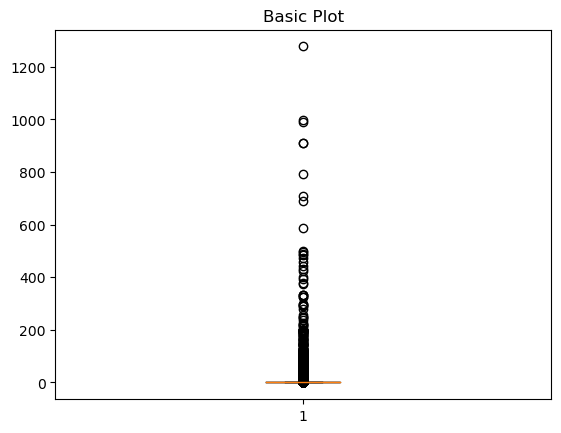

In [12]:
over_fmt = df['amount_over_fmt_usd'].values.tolist()

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(over_fmt)
plt.savefig('boxplot_paid.png')

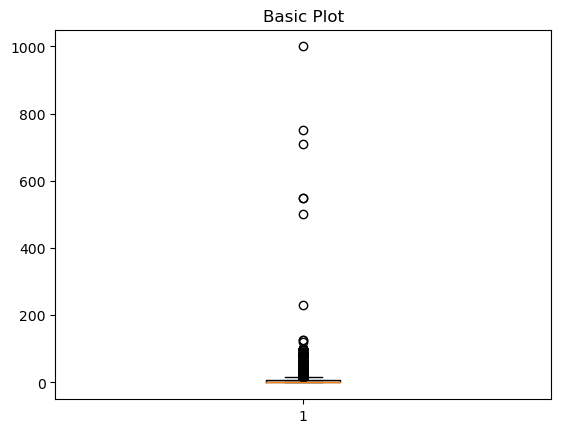

In [13]:
item_price_usd = df['item_price_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(item_price_usd)
plt.savefig('boxplot_item_price.png')

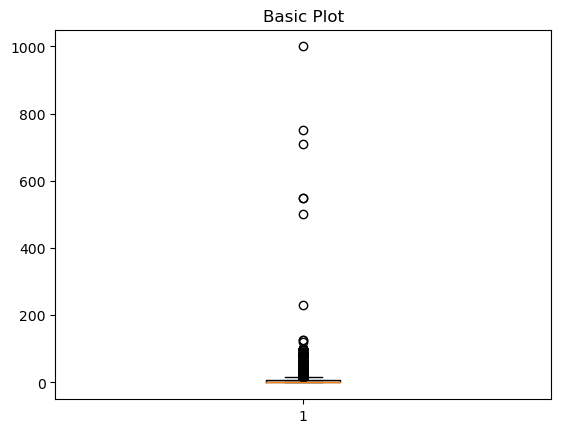

In [14]:
item_price = df['item_price_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(item_price_usd)
plt.savefig('boxplot_item_price.png')

## albumRelease

### Album summary stats

In [15]:
df_al = df[(df['item_type'] == 'a')]

In [16]:
df_al[['amount_paid_usd', 'item_price_usd', 'amount_over_fmt_usd']].describe().round(2)

,amount_paid_usd,item_price_usd,amount_over_fmt_usd
count,415031.00,415031.00,415031.00
mean,7.07,5.66,1.44
std,7.98,5.17,6.63
min,0.34,0.00,0.00
25%,3.52,1.92,0.00
50%,6.43,5.80,0.01
75%,10.00,8.96,1.00
max,1279.50,1000.00,1276.95


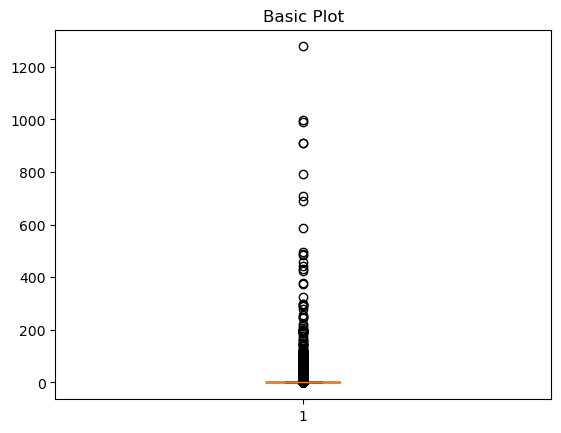

In [17]:
over_fmt = df_al['amount_over_fmt_usd'].values.tolist()

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(over_fmt)
plt.savefig('boxplot_paid.png')

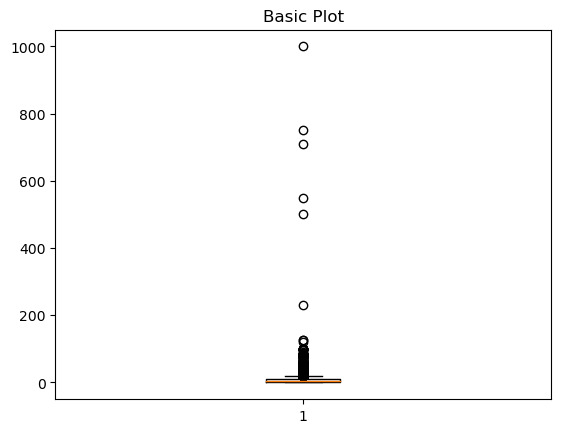

In [18]:
item_price_usd = df_al['item_price_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(item_price_usd)
plt.savefig('boxplot_item_price.png')

### Track summary stats

In [19]:
df_tr = df[(df['item_type'] == 't')]

In [20]:
df_tr[['amount_paid_usd', 'item_price_usd', 'amount_over_fmt_usd']].describe().round(2)

,amount_paid_usd,item_price_usd,amount_over_fmt_usd
count,249396.00,249396.00,249396.00
mean,2.16,1.67,0.51
std,4.27,1.85,3.95
min,0.20,0.00,0.00
25%,1.16,1.00,0.00
50%,1.50,1.29,0.00
75%,2.33,2.00,0.01
max,550.00,550.00,500.00


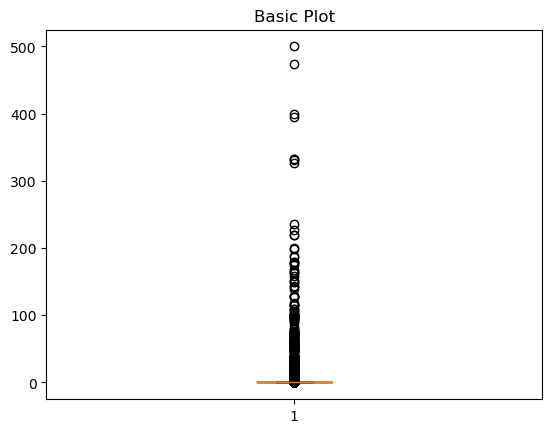

In [21]:
over_fmt = df_tr['amount_over_fmt_usd'].values.tolist()

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(over_fmt)
plt.savefig('boxplot_paid.png')

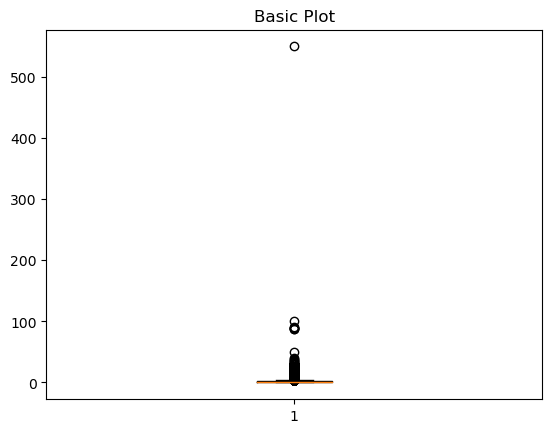

In [22]:
item_price_usd = df_tr['item_price_usd'].values.tolist()
fig2, ax2 = plt.subplots()
ax2.set_title('Basic Plot')
ax2.boxplot(item_price_usd)
plt.savefig('boxplot_item_price.png')

### feature transformation

Transformation of the albumRealse colum. This column initially states in what formats the product is sold. We will calculate in how many formats the product is sold. Is this value is equal to 1, we will know that this product is only sold digitally. If this number is greater than 1, we will know that the seller also sells the product in physical format.

In [23]:
albumRelease = df['albumRelease']

In [24]:
albumRelease_count = []
def album_release_count(lst):
    for x in range(0, len(lst)): 
        if df['item_type'][x] == 'a':
            albumReleases = ast.literal_eval(lst[x])
            albumRelease_count.append(len(albumReleases))
        elif df['item_type'][x] == 't': 
            albumRelease_count.append(1)
        else:
            continue

In [25]:
album_release_count(albumRelease)

In [26]:
df['albumRelease_count'] = albumRelease_count

In [27]:
df = df.drop(['albumRelease'], axis=1)

In [28]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,album_title,amount_paid_usd,_id_y,numTracks,name,dateModified,keywords,byArtist,track,@type,datePublished,offers,duration_secs,inAlbum,item_price_usd,amount_over_fmt_usd,albumRelease_count
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,NaN,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,"Alternative, noise, post-punk, Ireland","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,02 Sep 2020 13:45:09 GMT,NaN,NaN,NaN,9.99,0.0,1
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,NaN,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,28 Mar 2020 15:10:47 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,28 Mar 2020 15:10:13 GMT,NaN,NaN,NaN,1.30,0.0,1
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,NaN,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,21 Aug 2020 08:55:39 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,21 Aug 2020 08:55:39 GMT,NaN,NaN,NaN,3.90,0.0,1
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,NaN,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,"Experimental, retribution, United States",{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT,"{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,NaN,1.00,0.0,1
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,Cult Survivor,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,19 May 2020 23:55:06 GMT,"Alternative, alternative, Vienna",{'image': 'https://f4.bcbits.com/img/001805937...,NaN,"['MusicRecording', 'Product']",19 May 2020 23:50:24 GMT,{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,"{'name': 'Cult Survivor', '@id': 'https://sofi...",1.29,0.0,1


## album_title

In [29]:
album_title = df['album_title']

In [30]:
album_title_trans = []

In [31]:
def transform_album_title(album_title):
    for x in range(0, len(album_title)):
        if df['item_type'][x] == 't':
            if isinstance(album_title[x],str) == True:
                album_title_trans.append(1)
            else:
                album_title_trans.append(0)
        else:
            album_title_trans.append(0)

In [32]:
transform_album_title(album_title)

In [33]:
df['album_title_trans'] = album_title_trans

In [34]:
df = df.drop(['album_title'], axis=1)

In [35]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,dateModified,keywords,byArtist,track,@type,datePublished,offers,duration_secs,inAlbum,item_price_usd,amount_over_fmt_usd,albumRelease_count,album_title_trans
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,02 Sep 2020 13:45:09 GMT,"Alternative, noise, post-punk, Ireland","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,02 Sep 2020 13:45:09 GMT,NaN,NaN,NaN,9.99,0.0,1,0
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,28 Mar 2020 15:10:47 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,28 Mar 2020 15:10:13 GMT,NaN,NaN,NaN,1.30,0.0,1,0
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,21 Aug 2020 08:55:39 GMT,"Electronic, Psychedelic Trance, psytrance, London","{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,21 Aug 2020 08:55:39 GMT,NaN,NaN,NaN,3.90,0.0,1,0
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,26 Mar 2020 05:27:55 GMT,"Experimental, retribution, United States",{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"['MusicRecording', 'Product']",26 Mar 2020 05:27:56 GMT,"{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,NaN,1.00,0.0,1,0
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,19 May 2020 23:55:06 GMT,"Alternative, alternative, Vienna",{'image': 'https://f4.bcbits.com/img/001805937...,NaN,"['MusicRecording', 'Product']",19 May 2020 23:50:24 GMT,{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,"{'name': 'Cult Survivor', '@id': 'https://sofi...",1.29,0.0,1,1


## inAblum

Feature will be transformed into 'is' when the product is an album, into 'in' when the track is also sold in an album and into 'not' when the track is sold individually. 

In [36]:
inAlbum = df['inAlbum']

In [37]:
item_type = df['item_type']

In [38]:
mod_inAlbum = []

def new_inalbum(lst):
    for x in range(0, len(lst)):
        if item_type[x] == 'a':
            mod_inAlbum.append('is')
        elif item_type[x] == 't':
            if type(lst[x]) == str:
                mod_inAlbum.append('in')
            else:
                mod_inAlbum.append('not')

In [39]:
new_inalbum(inAlbum)

In [40]:
df['inAlbum_new'] = mod_inAlbum

In [41]:
df = df.drop('inAlbum', axis = 1) 

In [42]:
df = df.drop('album_title_trans', axis = 1)

## Date published and date modified 

Hours, second, minutes are deleted from the data published and date modified variables

In [43]:
date_published_values = df['datePublished'].values.tolist()
date_modified_values = df['dateModified'].values.tolist()

In [44]:
date_published = []
date_modified = []

def time_remove_pub(lst):
    for x in lst:
        y = x[:20]
        date_published.append(y)

def time_remove_mod(lst):
    for x in lst:
        y = x[:20]
        date_modified.append(y)

In [45]:
time_remove_pub(date_published_values)
time_remove_mod(date_modified_values)

In [46]:
date_published = pd.to_datetime(date_published)
date_modified = pd.to_datetime(date_modified)

In [47]:
def to_utc(lst, lst2):
    for x in lst:
        x = x.replace(tzinfo=timezone.utc).timestamp()
        lst2.append(x)

In [48]:
date_pub_utc = []
date_mod_utc = []

In [49]:
to_utc(date_published, date_pub_utc)
to_utc(date_modified, date_mod_utc)

In [50]:
df = df.drop(['dateModified', 'datePublished'], axis=1)

In [53]:
df['date_pub_utc'] = date_pub_utc
df['date_mod_utc'] = date_mod_utc

In [54]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,keywords,byArtist,track,@type,offers,duration_secs,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,"Alternative, noise, post-punk, Ireland","{'@id': 'https://girlbanddublin.bandcamp.com',...","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,NaN,NaN,9.99,0.0,1,is,1.599054e+09,1.599054e+09
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'MusicGroup', 'sameAs': ['http://www...","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,NaN,NaN,1.30,0.0,1,is,1.585408e+09,1.585408e+09
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,"Electronic, Psychedelic Trance, psytrance, London","{'sameAs': ['http://www.maharettarecords.com',...","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,NaN,NaN,3.90,0.0,1,is,1.598000e+09,1.598000e+09
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,"Experimental, retribution, United States",{'image': 'https://f4.bcbits.com/img/001206732...,NaN,"['MusicRecording', 'Product']","{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,1.00,0.0,1,not,1.585200e+09,1.585200e+09
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,"Alternative, alternative, Vienna",{'image': 'https://f4.bcbits.com/img/001805937...,NaN,"['MusicRecording', 'Product']",{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,1.29,0.0,1,in,1.589932e+09,1.589933e+09


## byArtist

The genre from this variables will be extraced and modified into a new variable

In [55]:
byArtist = df['byArtist']

In [56]:
by_artist_list = []

In [57]:
def str_to_dict(lst):
    for x in lst:
        y = ast.literal_eval(x)
        by_artist_list.append(y)

In [58]:
str_to_dict(byArtist)

In [59]:
byArtist_genre_lst = []
byArtist_type = []

def get_keys(lst): 
    for x in lst:
        genre = x.get('genre')
        byArtist_genre_lst.append(genre)
        at_type = x.get('@type')
        byArtist_type.append(at_type)

In [60]:
get_keys(by_artist_list)

In [61]:
byArtist_genre = []

def mod_genre(lst):
    for x in lst:
        if type(x) == str:
            x = x.replace("https://bandcamp.com/tag/","")
            byArtist_genre.append(x)
        else:
            byArtist_genre.append(float('nan'))

In [62]:
mod_genre(byArtist_genre_lst)

In [63]:
df = df.drop('byArtist', axis = 1)
df['byArtist_genre'] = byArtist_genre
df['byArtist_type'] = byArtist_type

In [64]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,keywords,track,@type,offers,duration_secs,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre,byArtist_type
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,"Alternative, noise, post-punk, Ireland","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,NaN,NaN,9.99,0.0,1,is,1.599054e+09,1.599054e+09,alternative,MusicGroup
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,NaN,NaN,1.30,0.0,1,is,1.585408e+09,1.585408e+09,electronic,MusicGroup
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,"Electronic, Psychedelic Trance, psytrance, London","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,NaN,NaN,3.90,0.0,1,is,1.598000e+09,1.598000e+09,electronic,MusicGroup
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,"Experimental, retribution, United States",NaN,"['MusicRecording', 'Product']","{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,1.00,0.0,1,not,1.585200e+09,1.585200e+09,experimental,MusicGroup
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,"Alternative, alternative, Vienna",NaN,"['MusicRecording', 'Product']",{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,1.29,0.0,1,in,1.589932e+09,1.589933e+09,alternative,MusicGroup


In [65]:
df['byArtist_genre'].unique()

array(['alternative', 'electronic', 'experimental', 'ambient', 'funk',
       'hip-hop-rap', nan, 'pop', 'reggae', 'rock', 'classical', 'jazz',
       'world', 'metal', 'soundtrack', 'punk', 'folk', 'country',
       'acoustic', 'r-b-soul', 'spoken-word', 'devotional', 'comedy',
       'blues', 'audiobooks', 'podcasts', 'latin', 'kids'], dtype=object)

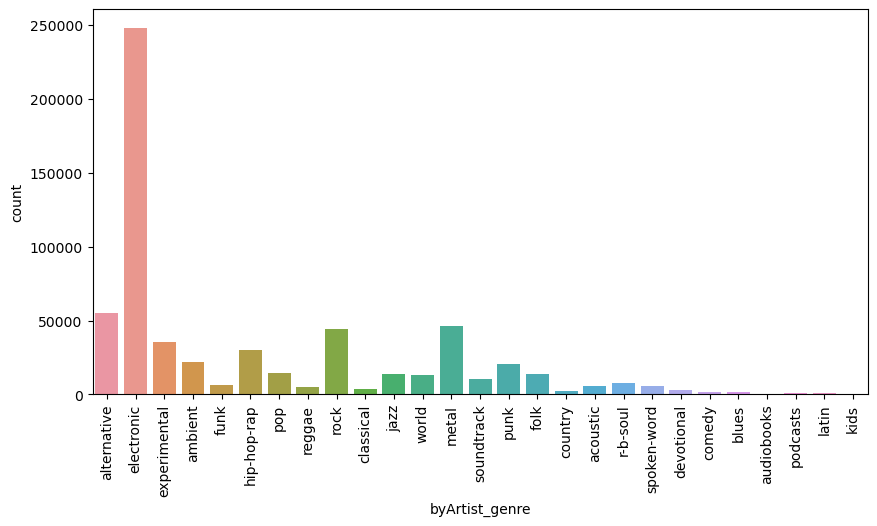

In [66]:
fig = plt.figure(figsize=(10, 5))

sns.countplot(x=df["byArtist_genre"])

plt.xticks(rotation=90)
plt.savefig('genre_count.png')

In [67]:
df['byArtist_type'].unique()

array(['MusicGroup'], dtype=object)

In [68]:
df = df.drop('byArtist_type', axis = 1)

In [69]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,keywords,track,@type,offers,duration_secs,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,"Alternative, noise, post-punk, Ireland","{'numberOfItems': 14, 'itemListElement': [{'po...",MusicAlbum,NaN,NaN,9.99,0.0,1,is,1.599054e+09,1.599054e+09,alternative
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,"Electronic, Psychedelic Trance, psytrance, London","{'@type': 'ItemList', 'numberOfItems': 1, 'ite...",MusicAlbum,NaN,NaN,1.30,0.0,1,is,1.585408e+09,1.585408e+09,electronic
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,"Electronic, Psychedelic Trance, psytrance, London","{'itemListElement': [{'@type': 'ListItem', 'po...",MusicAlbum,NaN,NaN,3.90,0.0,1,is,1.598000e+09,1.598000e+09,electronic
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,"Experimental, retribution, United States",NaN,"['MusicRecording', 'Product']","{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,1.00,0.0,1,not,1.585200e+09,1.585200e+09,experimental
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,"Alternative, alternative, Vienna",NaN,"['MusicRecording', 'Product']",{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,1.29,0.0,1,in,1.589932e+09,1.589933e+09,alternative


## track

In [70]:
df = df.drop('track', axis = 1)

In [71]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,keywords,@type,offers,duration_secs,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,"Alternative, noise, post-punk, Ireland",MusicAlbum,NaN,NaN,9.99,0.0,1,is,1.599054e+09,1.599054e+09,alternative
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,"Electronic, Psychedelic Trance, psytrance, London",MusicAlbum,NaN,NaN,1.30,0.0,1,is,1.585408e+09,1.585408e+09,electronic
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,"Electronic, Psychedelic Trance, psytrance, London",MusicAlbum,NaN,NaN,3.90,0.0,1,is,1.598000e+09,1.598000e+09,electronic
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,"Experimental, retribution, United States","['MusicRecording', 'Product']","{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,1.00,0.0,1,not,1.585200e+09,1.585200e+09,experimental
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,"Alternative, alternative, Vienna","['MusicRecording', 'Product']",{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,1.29,0.0,1,in,1.589932e+09,1.589933e+09,alternative


## @type

In [72]:
at_type = df['@type']

In [73]:
at_type[:10]

0                       MusicAlbum
1                       MusicAlbum
2                       MusicAlbum
3    ['MusicRecording', 'Product']
4    ['MusicRecording', 'Product']
5                       MusicAlbum
6                       MusicAlbum
7    ['MusicRecording', 'Product']
8    ['MusicRecording', 'Product']
9                       MusicAlbum
Name: @type, dtype: object

In [74]:
df = df.drop('@type', axis = 1)

In [75]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,keywords,offers,duration_secs,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,"Alternative, noise, post-punk, Ireland",NaN,NaN,9.99,0.0,1,is,1.599054e+09,1.599054e+09,alternative
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,"Electronic, Psychedelic Trance, psytrance, London",NaN,NaN,1.30,0.0,1,is,1.585408e+09,1.585408e+09,electronic
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,"Electronic, Psychedelic Trance, psytrance, London",NaN,NaN,3.90,0.0,1,is,1.598000e+09,1.598000e+09,electronic
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,"Experimental, retribution, United States","{'price': 1.0, 'priceCurrency': 'USD', 'availa...",313.914,1.00,0.0,1,not,1.585200e+09,1.585200e+09,experimental
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,"Alternative, alternative, Vienna",{'url': 'https://sofiefatouretchi.bandcamp.com...,181.191,1.29,0.0,1,in,1.589932e+09,1.589933e+09,alternative


## offers 

In [76]:
df = df.drop('offers', axis = 1)

## duration_secs 

In [77]:
df['duration_secs'].count()

249396

In [78]:
df['item_type'].value_counts()

a    415031
t    249396
Name: item_type, dtype: int64

In [79]:
df = df.drop('duration_secs', axis = 1)

In [80]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,keywords,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,"Alternative, noise, post-punk, Ireland",9.99,0.0,1,is,1.599054e+09,1.599054e+09,alternative
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,"Electronic, Psychedelic Trance, psytrance, London",1.30,0.0,1,is,1.585408e+09,1.585408e+09,electronic
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,"Electronic, Psychedelic Trance, psytrance, London",3.90,0.0,1,is,1.598000e+09,1.598000e+09,electronic
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,"Experimental, retribution, United States",1.00,0.0,1,not,1.585200e+09,1.585200e+09,experimental
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,"Alternative, alternative, Vienna",1.29,0.0,1,in,1.589932e+09,1.589933e+09,alternative


## keywords

In [81]:
keywords = df['keywords']

In [82]:
keyword_lst = []

def keyword_list(lst):
    for i in range(0, len(lst)):
        j = str(lst[i])
        j = j.replace(" ", "").replace("-", "").replace(".", "").replace("&", "").replace("'", "").lower()
        x = j.split(",")
        for k in range(0,1):
            if len(x) == 1:
                keyword_lst.append(x[0])
            else:
                if x[k] == df['byArtist_genre'][i]:
                    if len(x) == 2:
                        keyword_lst.append(x[1])
                    else:
                        if x[k+1] == df['byArtist_genre'][i]:
                            keyword_lst.append(x[k+2])
                        else:
                            keyword_lst.append(x[k+1])
                else:
                    keyword_lst.append(x[k])

In [83]:
keyword_list(keywords)

In [84]:
df['keywords_new'] = keyword_lst

In [85]:
df['keywords_new'].nunique()

22019

In [86]:
df = df.drop(['keywords', 'keywords_new'], axis = 1)

In [87]:
df.head()

,index,item_type,utc_date,country_code,item_description,art_id,artist_name,currency,amount_paid_usd,_id_y,numTracks,name,item_price_usd,amount_over_fmt_usd,albumRelease_count,inAlbum_new,date_pub_utc,date_mod_utc,byArtist_genre
0,0,a,1.599689e+09,gb,Live at Vicar Street,2.064053e+08,Girl Band,USD,9.99,https://girlbanddublin.bandcamp.com/album/live...,14.0,Live at Vicar Street,9.99,0.0,1,is,1.599054e+09,1.599054e+09,alternative
1,1,a,1.599689e+09,fi,Neurogen,2.984242e+09,Jirah,GBP,1.30,https://maharettarecords.bandcamp.com/album/ne...,1.0,Neurogen,1.30,0.0,1,is,1.585408e+09,1.585408e+09,electronic
2,2,a,1.599689e+09,fi,The Last Snare Bender,3.320495e+09,D-Ther,GBP,3.90,https://maharettarecords.bandcamp.com/album/th...,2.0,The Last Snare Bender,3.90,0.0,1,is,1.598000e+09,1.598000e+09,electronic
3,3,t,1.599689e+09,us,O Ruthless Great Divine Director,3.428873e+09,LINGUA IGNOTA,USD,1.00,https://linguaignota.bandcamp.com/track/o-ruth...,NaN,O Ruthless Great Divine Director,1.00,0.0,1,not,1.585200e+09,1.585200e+09,experimental
4,4,t,1.599689e+09,us,Try to Reach Me,7.723710e+08,Sofie,USD,1.29,https://sofiefatouretchi.bandcamp.com/track/tr...,NaN,Try to Reach Me,1.29,0.0,1,in,1.589932e+09,1.589933e+09,alternative


In [88]:
df.to_csv('data_cleaned.csv')